    X1   X2  Cluster
0  5.9  3.2        1
1  4.6  2.9        0
2  6.2  2.8        1
3  4.7  3.2        0
4  5.5  4.2        2
5  5.0  3.0        0
6  4.9  3.1        0
7  6.7  3.1        1
8  5.1  3.8        2
9  6.0  3.0        1


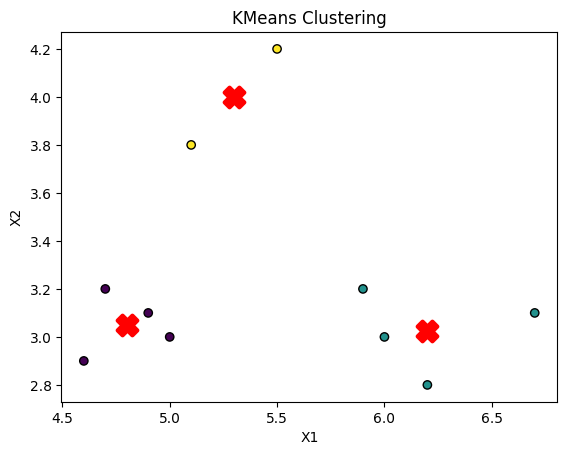

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def kmeans(X, num_clusters, num_iterations=100):
    # Randomly initialize centroids
    centroids = X[np.random.choice(range(len(X)), num_clusters, replace=False)]

    for _ in range(num_iterations):
        # Assign each data point to the nearest centroid
        labels = np.argmin(np.linalg.norm(X[:, None] - centroids, axis=2), axis=1)

        # Update centroids based on the mean of the assigned data points
        centroids = np.array([X[labels == i].mean(axis=0) for i in range(num_clusters)])

    return labels, centroids


df = pd.read_csv("kmeans.csv")

# Specify the columns for clustering
columns_for_clustering = ['X1', 'X2']

# Extract the data for clustering
X = df[columns_for_clustering].values

# Specify the number of clusters
num_clusters = 3

# Apply KMeans
labels, centroids = kmeans(X, num_clusters)

# Add the cluster labels to the dataframe
df['Cluster'] = labels

# Display the dataframe with cluster labels
print(df)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='r')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('KMeans Clustering')
plt.show()
